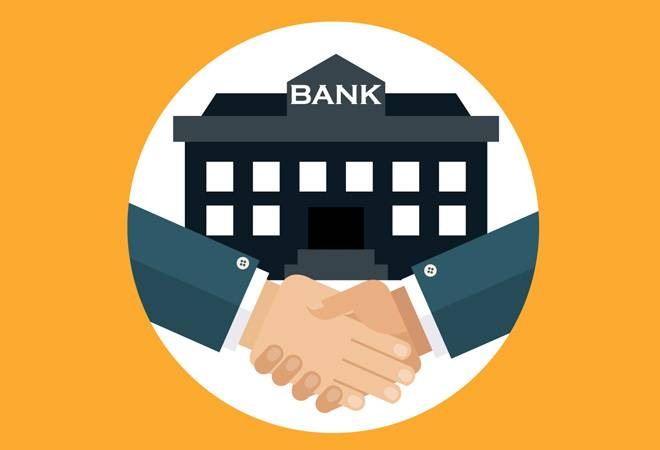

# 1. Overview:-
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically| target these customers. Here they have provided a partial data set.
### Features of dataset:-
1.Loan_ID= Unique Loan ID

2.Gender= Male/ Female

3.Married= Applicant married (Y/N)

4.Dependents= Number of dependents

5.Education= Applicant Education (Graduate/ Under Graduate)

6.Self_Employed= Self-employed (Y/N)

7.ApplicantIncome= Applicant income

8.CoapplicantIncome= Coapplicant income

9.LoanAmount= Loan amount in thousands

10.Loan_Amount_Term= Term of the loan in months

11.Credit_History= Credit history meets guidelines

12.Property_Area= Urban/ Semi-Urban/ Rural

13.Loan_Status= (Target) Loan approved (Y/N)

## 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib
import warnings


warnings.simplefilter(action='ignore')


## 3. Load Data

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 4. Exploratory Data Analysis Individual Feature Patterns using our libraries

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 1. there are 13 columns and 614 records in dataset.
 2. there are different data types like object, int and float.
 3. there are missing values in some columns like gender, married, dependents, self employed, LoanAmount,Loan_Amount_Term and Credit_History        


### Check duplication

In [4]:
df.duplicated().values.any()

False

there is no any dublication in data

In [5]:
categorical_columns = df[['Gender','Married','Dependents','Education','Self_Employed', 'Credit_History',
                       'Property_Area', 'Loan_Status', 'Loan_Amount_Term']]
categorical_columns

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,360.0
1,Male,Yes,1,Graduate,No,1.0,Rural,N,360.0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,360.0
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,360.0
4,Male,No,0,Graduate,No,1.0,Urban,Y,360.0
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,360.0
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,180.0
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,360.0
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,360.0


### Exploratory Data Analysis (EDA) for categorical data like:-
1. name of columns.
2. name of unique values.
3. number of values
4. number of missing values.
5. count of each value descending order.

In [6]:
for col in categorical_columns:
    print('Column:',col, '\n')
    print(f'Name of values:{df[col].unique()}', '\n')
    print(f'Number of values:{df[col].nunique()}', '\n')
    print(f'Number of missing values:{df[col].isnull().sum()}', '\n')
    print(f'Count of value:\n{df[col].value_counts()}')
    print('_'*50, '\n')

Column: Gender 

Name of values:['Male' 'Female' nan] 

Number of values:2 

Number of missing values:13 

Count of value:
Male      489
Female    112
Name: Gender, dtype: int64
__________________________________________________ 

Column: Married 

Name of values:['No' 'Yes' nan] 

Number of values:2 

Number of missing values:3 

Count of value:
Yes    398
No     213
Name: Married, dtype: int64
__________________________________________________ 

Column: Dependents 

Name of values:['0' '1' '2' '3+' nan] 

Number of values:4 

Number of missing values:15 

Count of value:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
__________________________________________________ 

Column: Education 

Name of values:['Graduate' 'Not Graduate'] 

Number of values:2 

Number of missing values:0 

Count of value:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
__________________________________________________ 

Column: Self_Employed 

Name of values:['N

In [7]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
numerical_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

### Visaulization numerical features 

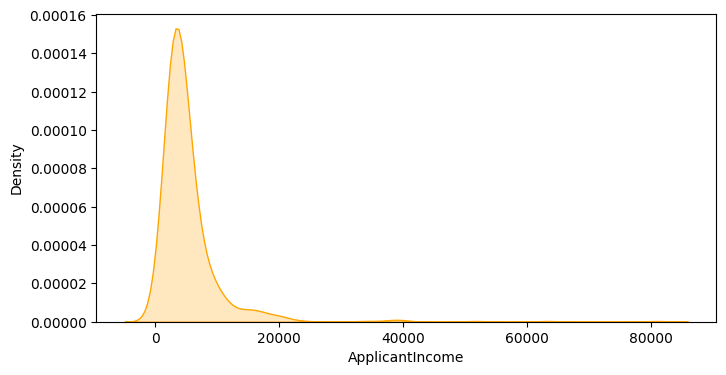

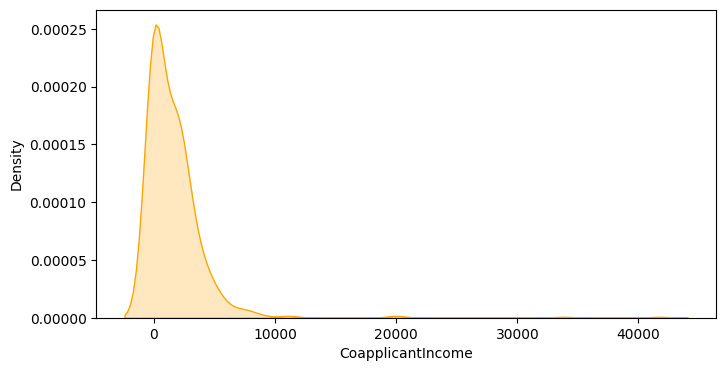

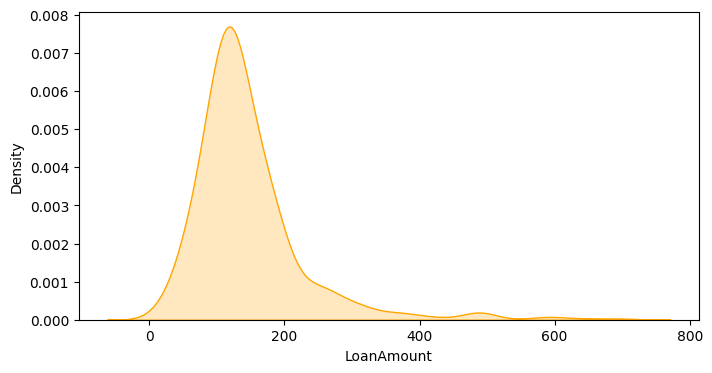

In [8]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], color='orange', shade=True)
    plt.show()

if we see, there are skewness (right skewness) in all numerical features because the average (mean) is soo high than the median.

so, we will have many outliers and we will visualize them later..

we can see this in this table too.

In [9]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### Visaulization categorical features

this visualization show which value is higher (per percentage) than the remains values.

In [10]:
for col in df[['Gender','Married','Dependents','Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]:
    classes=df[col].value_counts().index
    Class_series=pd.Series(df[col])
    data = Class_series.value_counts().tolist()
    fig = px.pie(values=Class_series.value_counts(), names=classes, width=700, height=450, 
                 color_discrete_sequence=["skyblue","black"],title=f"Percentage Between values in {col} Feature")
    fig.show()

this visualization show which value is higher (per count) than the reamins vlaues.

<AxesSubplot: xlabel='count', ylabel='Loan_Amount_Term'>

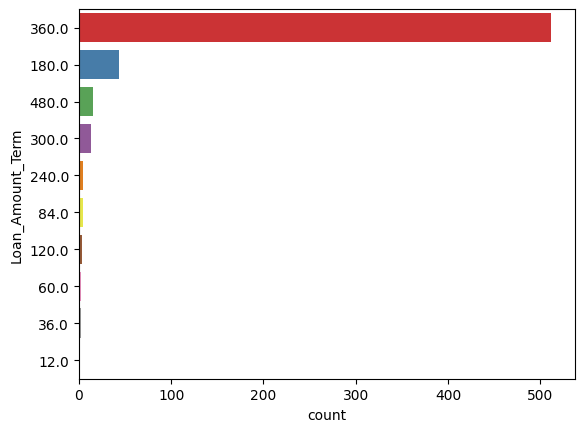

In [11]:
sns.countplot(y=df['Loan_Amount_Term'], order=df['Loan_Amount_Term'].value_counts().index, palette='Set1')

### Visualization outliers for numerical features with loan_statues features 

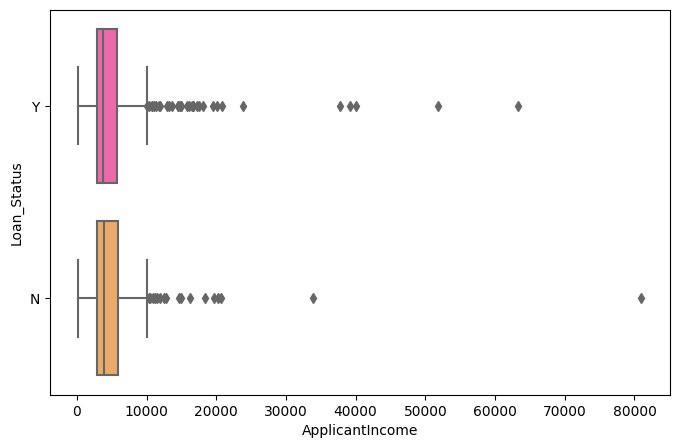

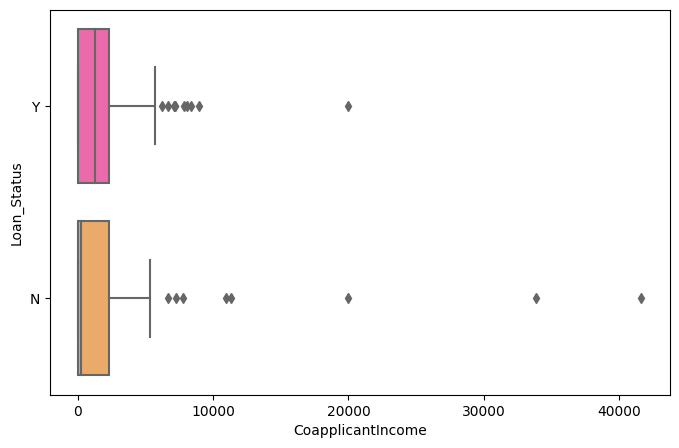

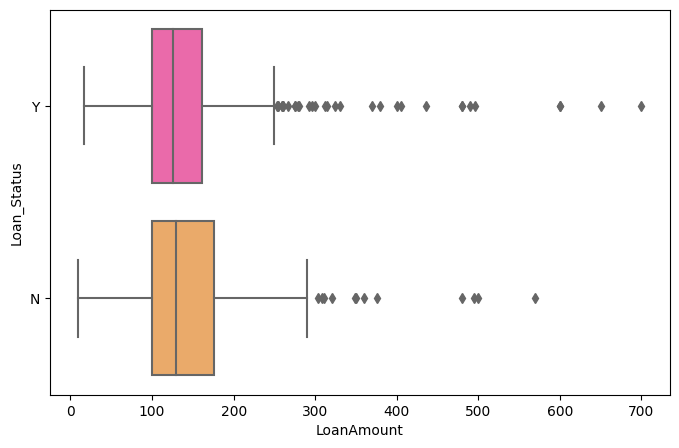

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df['Loan_Status'], palette='spring')
    plt.show()

As we was discussed, there are many outliers but we can't handle it because we should ask the business user firstly.

In [13]:
for col in df[['Gender','Married','Dependents','Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]:
    if col != 'Loan_Status':
        fig = px.histogram(df, x=col, color='Loan_Status')
        fig.update_layout(
            title=f"Distribution of Loan Approval Status by {col}",
            xaxis_title=col,
            yaxis_title="Count",
            legend_title="Loan Status"
        )
        fig.show()

_____________________________________________________________________________________ 
 Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


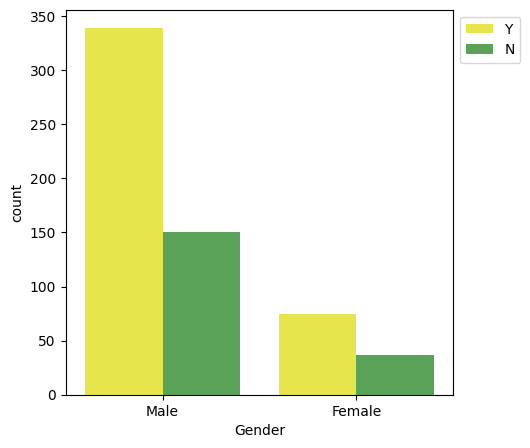

_____________________________________________________________________________________ 
 Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


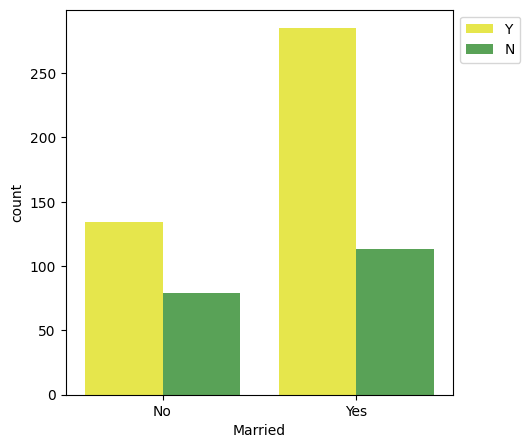

_____________________________________________________________________________________ 
 Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


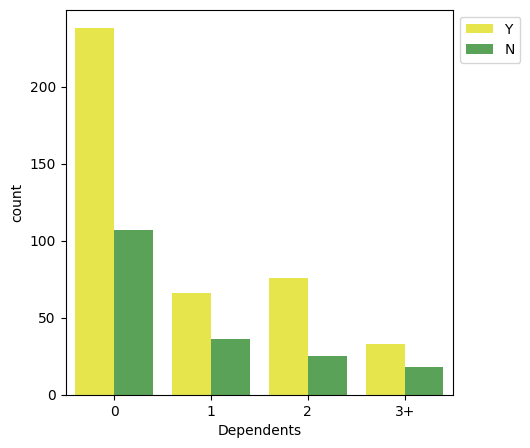

_____________________________________________________________________________________ 
 Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


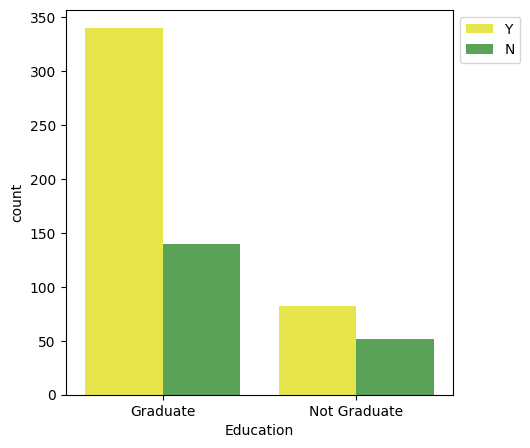

_____________________________________________________________________________________ 
 Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


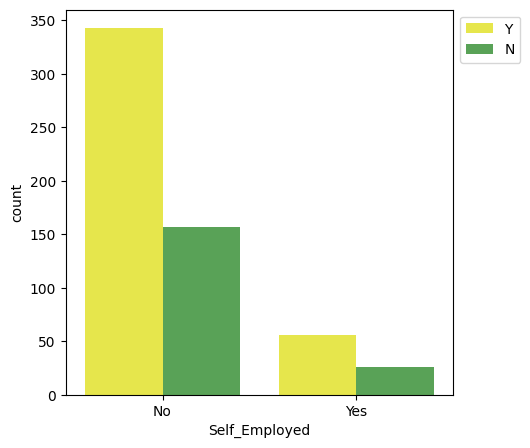

_____________________________________________________________________________________ 
 Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


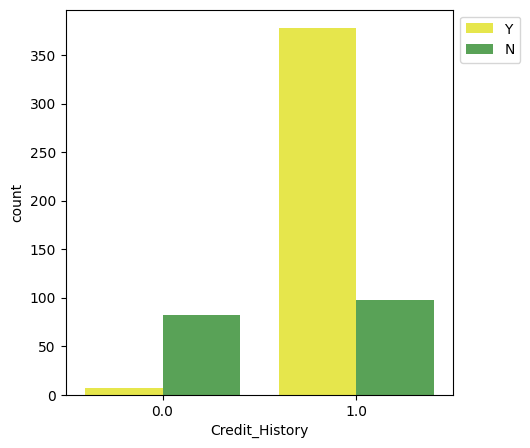

_____________________________________________________________________________________ 
 Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


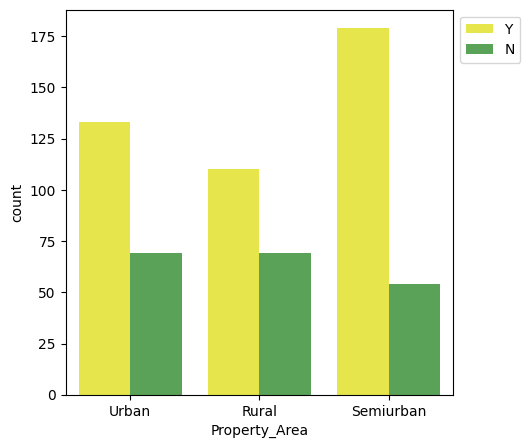

In [14]:
for col in df[['Gender','Married','Dependents','Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]:
    if col !='Loan_Status':
        
        print('_'*85, '\n' , pd.crosstab(index=df[col], columns=df['Loan_Status']))
        plt.figure(figsize=(5,5))
        sns.countplot(x=df[col], hue=df['Loan_Status'], palette='Set1_r')
        plt.legend(bbox_to_anchor=(1,1),loc=2)
        plt.show()

Loan_Status         N    Y
Loan_Amount_Term          
12.0                0    1
36.0                2    0
60.0                0    2
84.0                1    3
120.0               0    3
180.0              15   29
240.0               1    3
300.0               5    8
360.0             153  359
480.0               9    6


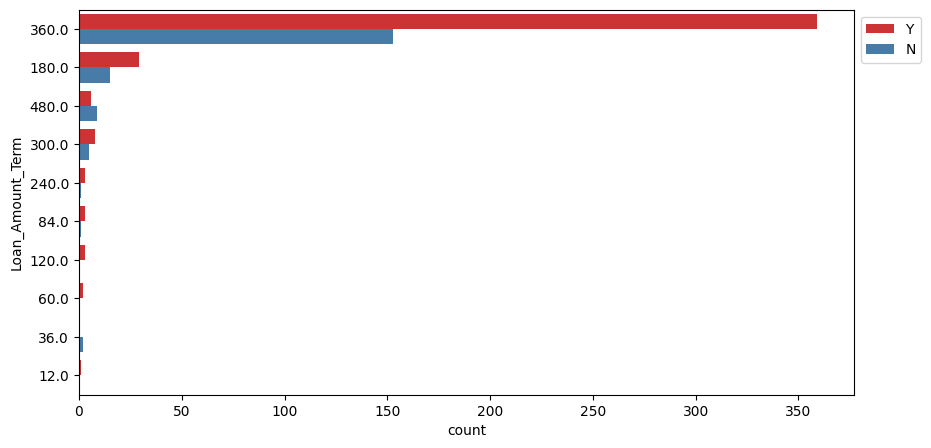

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Loan_Amount_Term'], order=df['Loan_Amount_Term'].value_counts().index, hue=df['Loan_Status'] , palette='Set1')
print(pd.crosstab(df['Loan_Amount_Term'], df['Loan_Status']))
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt. show()

## Data Preprocessing

### a. check missing values

In [16]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Check the most frequent value (mode) for categorical features that have missing values (NAN).

In [17]:
for col in df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']]:
    print(col,': ',df[col].mode()[0], '\n')

Gender :  Male 

Married :  Yes 

Dependents :  0 

Self_Employed :  No 

Credit_History :  1.0 

Loan_Amount_Term :  360.0 



In [18]:
for col in df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']]:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

- we will handle missing value with median for LoanAmount feature because it has many outliers

In [21]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [22]:
df.isna().values.any()

False

### b. Feature Extraction and Transformation

In [23]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

- ApplicantIncome and CoapplicantIncome features can get from them a new feature (feature extarction) called TotalIncome

In [24]:
def Dependents(value):
    if value == '0':
        return 'Zero'
    elif value == '1':
        return 'One'
    elif value == '2':
        return 'Two'
    else:
        return 'More Than Three'
    
print(Dependents('0'))
print(Dependents('1'))
print(Dependents('2'))
print(Dependents('3+'))
print(Dependents('5'))

Zero
One
Two
More Than Three
More Than Three


In [25]:
df['Dependents'] = df['Dependents'].apply(Dependents)

### c. Drop unnecessary features

In [26]:
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID'], inplace=True)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,Zero,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,One,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,Zero,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,Zero,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,Zero,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


### d. Change dtype for some features

In [28]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
TotalIncome         float64
dtype: object

In [29]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('O')

- change Loan_Amount_Term into object dtype

In [30]:
df['Loan_Amount_Term'].dtypes

dtype('O')

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,Zero,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,One,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,Zero,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,Zero,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,Zero,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


### e. Encode Categorical Data

In [96]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [32]:
df.to_csv('data.csv', index=False)

In [97]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,Zero,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,One,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,Zero,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,Zero,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,Zero,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0


In [98]:
for col in df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area']]:
    df[col] = LabelEncoder().fit_transform(df[col])

In [99]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,3,0,0,128.0,8,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,8,1.0,0,0,6091.0
2,1,1,3,0,1,66.0,8,1.0,2,1,3000.0
3,1,1,3,1,0,120.0,8,1.0,2,1,4941.0
4,1,0,3,0,0,141.0,8,1.0,2,1,6000.0


### f. Correlation

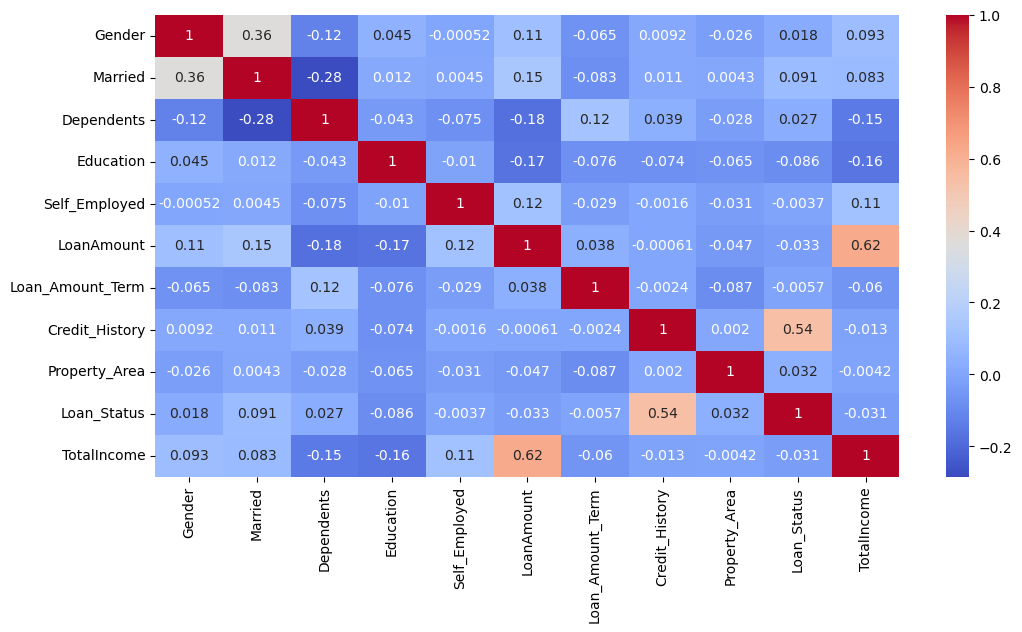

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### g. Measure P-Value for each feature

In [107]:
for col in df.columns:
    if col != 'Loan_Status':
        
        pearson_coef, p_value = stats.pearsonr(df[col], df['Loan_Status'])
        print(f"The Pearson Correlation Coefficient for {col} with Loan Status is", pearson_coef)
        print("with a P-value of P =", p_value) 
        
        if p_value < 0.001:
            print('there is strong evidence that the correlation is significant')
            
        elif p_value < 0.05:
            print('there is moderate evidence that the correlation is significant')
            
        elif p_value < 0.1:
            print('there is weak evidence that the correlation is significant')
            
        elif p_value > 0.1:
            print('there is no evidence that the correlation is significant')
            
        print('-'*100)  
        print()


The Pearson Correlation Coefficient for Gender with Loan Status is 0.017986678707032133
with a P-value of P = 0.6564497584643865
there is no evidence that the correlation is significant
----------------------------------------------------------------------------------------------------

The Pearson Correlation Coefficient for Married with Loan Status is 0.09147782473606048
with a P-value of P = 0.02339836279662128
there is moderate evidence that the correlation is significant
----------------------------------------------------------------------------------------------------

The Pearson Correlation Coefficient for Dependents with Loan Status is 0.027067082146855652
with a P-value of P = 0.5032073081669051
there is no evidence that the correlation is significant
----------------------------------------------------------------------------------------------------

The Pearson Correlation Coefficient for Education with Loan Status is -0.08588391467536523
with a P-value of P = 0.0333606775

# Model Development

In [196]:
x,y = SMOTE().fit_resample(df.drop('Loan_Status', axis=1), df['Loan_Status'])
oversampled = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)

In [197]:
oversampled

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1,0,3,0,0,128.000000,8,1.000000,2,5849.000000,1
1,1,1,1,0,0,128.000000,8,1.000000,0,6091.000000,0
2,1,1,3,0,1,66.000000,8,1.000000,2,3000.000000,1
3,1,1,3,1,0,120.000000,8,1.000000,2,4941.000000,1
4,1,0,3,0,0,141.000000,8,1.000000,2,6000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
839,0,0,2,0,0,139.368099,8,0.091030,0,4293.992040,0
840,1,0,1,0,0,199.488776,8,0.000000,1,14074.038039,0
841,0,0,3,0,0,103.054050,7,0.189190,1,4273.216265,0
842,1,0,2,0,0,180.587737,8,1.000000,1,11967.087824,0


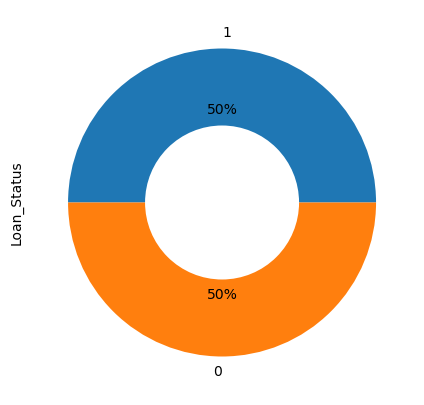

In [198]:
plt.figure(figsize=(10,5))
oversampled['Loan_Status'].value_counts().plot.pie(autopct='%2.f%%')
centre = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)

In [199]:
x = oversampled.drop('Loan_Status', axis=1)
y = oversampled['Loan_Status']

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=110)            

In [202]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [203]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Naive" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "XGBClassifier" : XGBClassifier()
}

In [231]:
for name, model in models.items():
    print(f'Using model: {name}', '\n')
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)

    print("-" * 10)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print("-" * 10)
    print("\n")


Using model: LogisticRegression 

----------
Training Accuracy: 0.7659574468085106
Testing Accuracy: 0.7849462365591398
Testing F-1: 0.8095238095238095
----------


Using model: Naive 

----------
Training Accuracy: 0.756838905775076
Testing Accuracy: 0.7688172043010753
Testing F-1: 0.8018433179723502
----------


Using model: KNN 

----------
Training Accuracy: 0.8252279635258358
Testing Accuracy: 0.7795698924731183
Testing F-1: 0.7939698492462313
----------


Using model: SVC 

----------
Training Accuracy: 0.7781155015197568
Testing Accuracy: 0.7741935483870968
Testing F-1: 0.809090909090909
----------


Using model: DecisionTreeClassifier 

----------
Training Accuracy: 1.0
Testing Accuracy: 0.7903225806451613
Testing F-1: 0.7891891891891891
----------


Using model: RandomForestClassifier 

----------
Training Accuracy: 1.0
Testing Accuracy: 0.8387096774193549
Testing F-1: 0.8484848484848486
----------


Using model: XGBClassifier 

----------
Training Accuracy: 1.0
Testing Accura

In [233]:
model = XGBClassifier(n_estimators=220, max_depth=2)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')

Training Accuracy: 0.9270516717325228
Testing Accuracy: 0.8440860215053764
Testing F-1: 0.852791878172589


In [236]:
pd.DataFrame({'Actual': y_test, 'Prediction': y_pred}).head(50)

,Actual,Prediction
92,1,1
184,1,1
303,1,1
405,1,1
779,0,0
145,1,1
94,1,1
607,1,1
450,0,0
30,0,0


In [240]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,3,0,0,128.000000,8,1.000000,2,5849.000000
1,1,1,1,0,0,128.000000,8,1.000000,0,6091.000000
2,1,1,3,0,1,66.000000,8,1.000000,2,3000.000000
3,1,1,3,1,0,120.000000,8,1.000000,2,4941.000000
4,1,0,3,0,0,141.000000,8,1.000000,2,6000.000000
...,...,...,...,...,...,...,...,...,...,...
839,0,0,2,0,0,139.368099,8,0.091030,0,4293.992040
840,1,0,1,0,0,199.488776,8,0.000000,1,14074.038039
841,0,0,3,0,0,103.054050,7,0.189190,1,4273.216265
842,1,0,2,0,0,180.587737,8,1.000000,1,11967.087824


In [237]:
data = [1, 0, 2, 1, 1, 150, 6, 1, 1, 5500]

# Transform data and make prediction
data_transformed = scaler.transform([data])
prediction = model.predict(data_transformed)

# Print prediction
if prediction == 1:
    print('Loan is Accepted')
else:
    print('Loan is not Accepted')

Loan is Accepted


In [246]:
data=[0,0,1,0,1,200,3,1,1,1500]

data_transformed = scaler.transform([data])
prediction = model.predict(data_transformed)

# Print prediction
if prediction == 1:
    print('Loan is Accepted')
else:
    print('Loan is not Accepted')

Loan is not Accepted


###  d. save model to build API using streamlit framework

In [248]:
joblib.dump(model , "final_model.h5")

['final_model.h5']

In [249]:
joblib.dump(scaler , "scaler.h5")

['scaler.h5']